__status  狀態值解釋__
* 0       : 健康的人
* 1~50    : 受感染但'沒有'傳染力 (正常更新時+1)
* 51~500  : 受感染且有傳染力 (正常更新時+1)
* 501~600 : 死亡or隔離(無傳染力), 單純是畫面顯示需要 (正常更新時+1)
* 601     : 不再更新狀態

__r__ (float) (約0.001~0.002) 接觸距離(半徑)

__n__ (int) 點位數量 (1000) 太少可以增加 r 提高接觸機會


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stackplot(n=1000, r=0.0015):
    n_ = n
    n -= 1
    s = 1
    p = r**2 * np.pi * s
    status = np.zeros(n+1).astype(np.int)
    status[0] = 51 # 0號病人
    ind = 1 # 追加新病人的index
    n_lst = [n] # 初始狀態init
    s_lst = [s] # 初始狀態init
    i = 1
    while True:
        s_ = np.random.binomial(n, p) # 二項分布 求被傳染人數
        # s_ = np.random.choice(2, n, p=[1 - p, p]).sum() # 等於上面
        if s_:
            status[ind:ind+s_] = 1
            ind += s_
        status[np.bitwise_and(status > 0, status <= 500)] += 1
        s = len(status[np.bitwise_and(status > 50, status <= 500)]) # 超過51才有傳染力 (s update)
        p = (r**2 * np.pi * s) # 這裡忽略病人同時可能佔據的空間機率 (p update)
        n -= s_ # (p update)
        i += 1
        n_lst.append(n)
        s_lst.append(s)
#         print(f'n:{n},  s:{s},  k:{n_-n-r},  s_:{s_}')
        if s == 0 or n == 0:
            break
    
    # 畫圖區        
    n_rr = np.array(n_lst).astype(np.int)
    s_rr = np.array(s_lst).astype(np.int)
    k_rr = n_ - n_rr - s_rr
    step = i
    x = np.arange(step)

    plt.figure(figsize=(8, 5))
    plt.stackplot(x, s_rr, n_rr, k_rr, colors=['r', 'g', 'gray'])
    plt.xlim([0, step])
    plt.ylim([0, n_])
    plt.show()

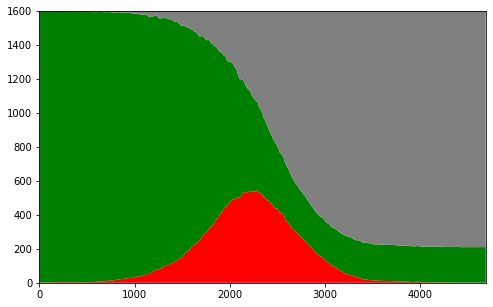

In [3]:
stackplot(1600, 0.001)

r=0.001


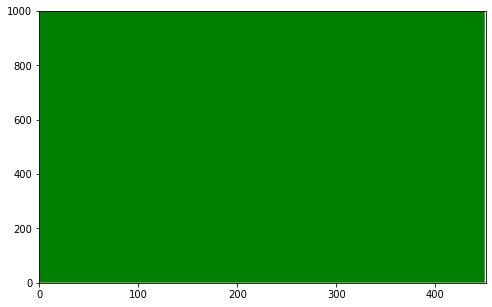

r=0.0011


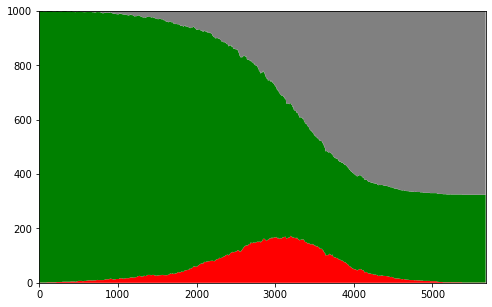

r=0.0012


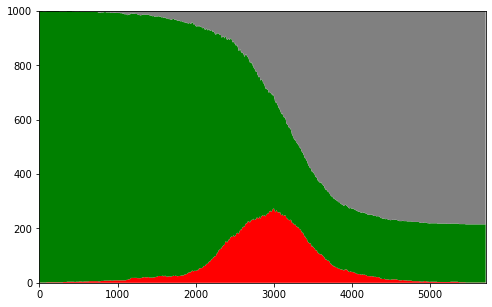

r=0.0013


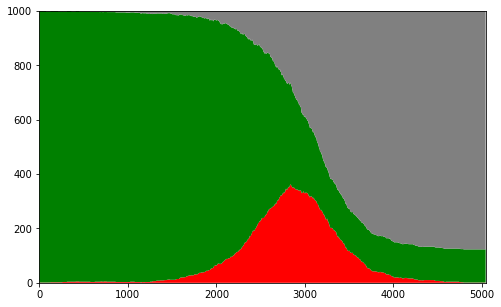

r=0.0014


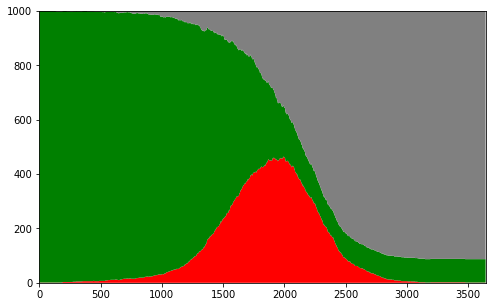

r=0.0015


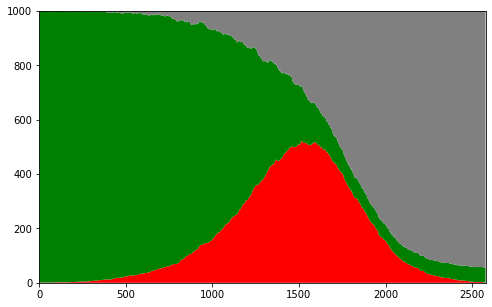

r=0.0016


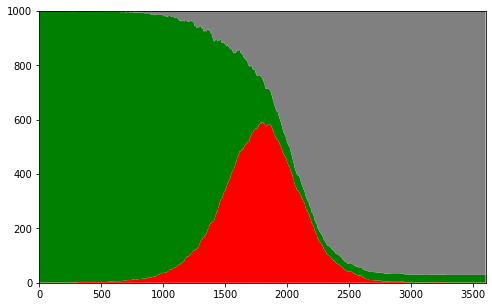

r=0.0017


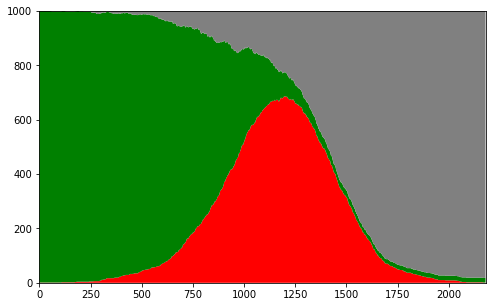

r=0.0018


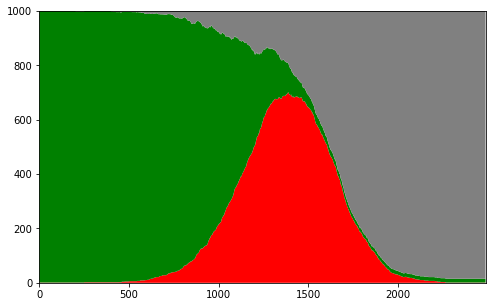

r=0.0019


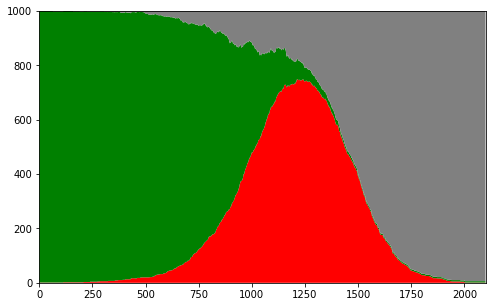

In [4]:
for i in range(10):
    r = 0.001+(i*0.0001)
    print(f'r={round(r, 5)}')
    stackplot(1000, r)

n: 800


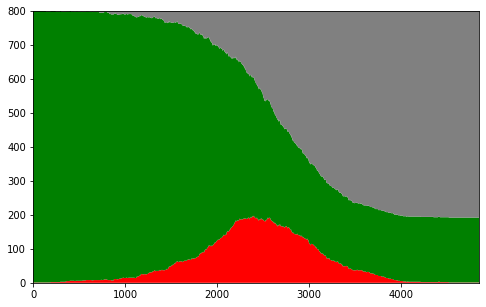

n: 1000


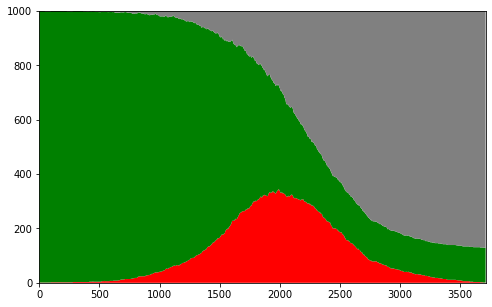

n: 1200


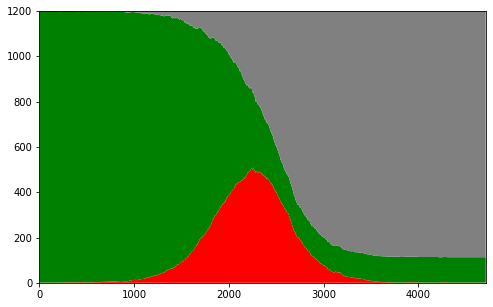

n: 1400


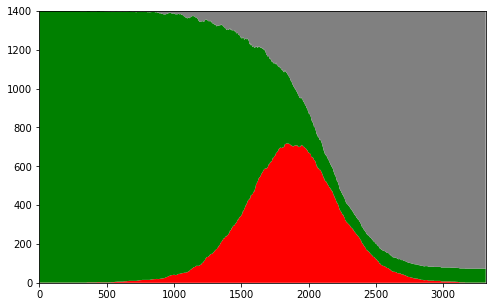

n: 1600


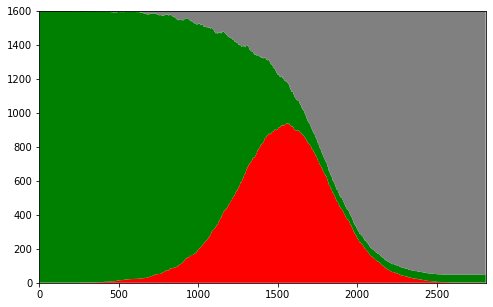

n: 1800


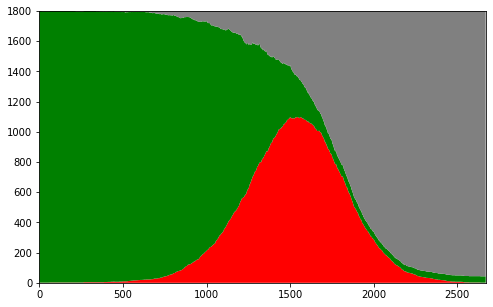

n: 2000


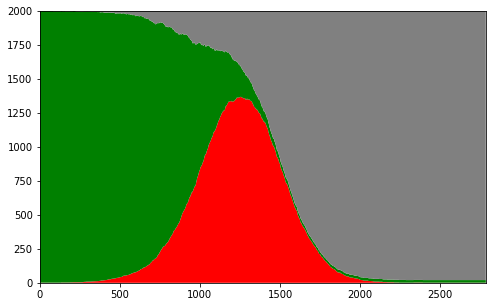

n: 2200


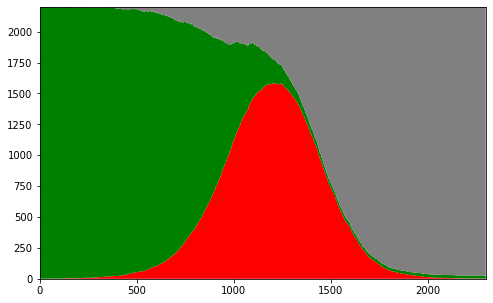

n: 2400


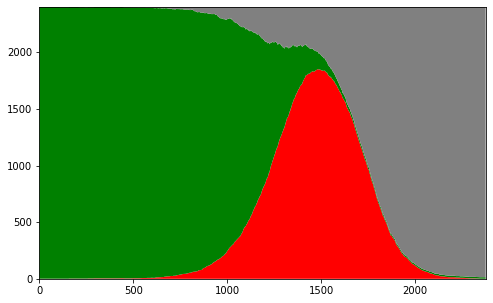

n: 2600


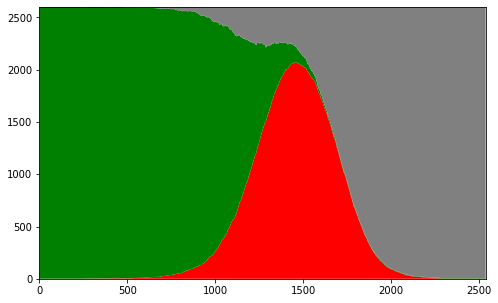

In [5]:
for i in range(10):
    n = 800 + i * 200
    print(f'n: {n}')
    stackplot(n, 0.00125)